In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Librerias.Raiz as rr
import Librerias.Integral as In 
import Librerias.Interpolacion1 as Ip 
import Librerias.EcuacionesDiferenciabes as ed
%load_ext autoreload
%autoreload 2

# Presentación de librerías
Metodo para encontrar raices de polinomios

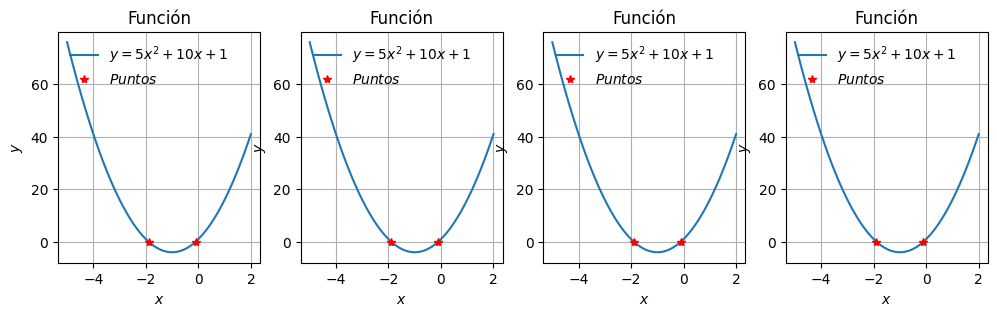

In [12]:
x = np.linspace(-5,2,100)
f = lambda x: 5*x**2 + 10*x + 1
x2 = rr.raiz_biseccion([-5,2],f)
y2 = np.zeros(len(x2))
x3 = rr.raiz_newton([-5,2],f)
x4 = rr.raiz_secante1([-5,2],f)
x5 = rr.raiz_secante2([-5,2],f)
fig, ax = plt.subplots(1,4, figsize=(12,3))

ax[0].plot(x, f(x), label=r"$y = 5x^2+10x +1$")
ax[0].plot(x2, y2, 'r*',label=r"$Puntos$")
ax[0].legend(loc=2, frameon=False) # upper left corner
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Función')
ax[0].grid()

ax[1].plot(x, f(x), label=r"$y = 5x^2+10x +1$")
ax[1].plot(x3, y2, 'r*',label=r"$Puntos$")
ax[1].legend(loc=2, frameon=False) # upper left corner
ax[1].set_xlabel(r'$x$')
ax[1].set_ylabel(r'$y$')
ax[1].set_title('Función')
ax[1].grid()

ax[2].plot(x, f(x), label=r"$y = 5x^2+10x +1$")
ax[2].plot(x4, y2, 'r*',label=r"$Puntos$")
ax[2].legend(loc=2, frameon=False) # upper left corner
ax[2].set_xlabel(r'$x$')
ax[2].set_ylabel(r'$y$')
ax[2].set_title('Función')
ax[2].grid()

ax[3].plot(x, f(x), label=r"$y = 5x^2+10x +1$")
ax[3].plot(x5, y2, 'r*',label=r"$Puntos$")
ax[3].legend(loc=2, frameon=False) # upper left corner
ax[3].set_xlabel(r'$x$')
ax[3].set_ylabel(r'$y$')
ax[3].set_title('Función')
ax[3].grid()

## Encontrar las derivadas de una función

In [15]:
## Comparemos
f = lambda x: np.cos(x)*np.tan(x)
df = lambda x: np.cos(x)

x = 0.2
hval = [10.**(-i) for i in np.arange(1, 20, 1)]

# implementacion
datD = np.array([In.D_central(f,x,h) for h in hval]) # Aquí va la derivada
datC = np.array([In.D_simp(x,h,f) for h in hval])

# error absoluto
dfx = df(x)
EdatD = abs(datD-dfx)
EdatC = abs(datC-dfx)

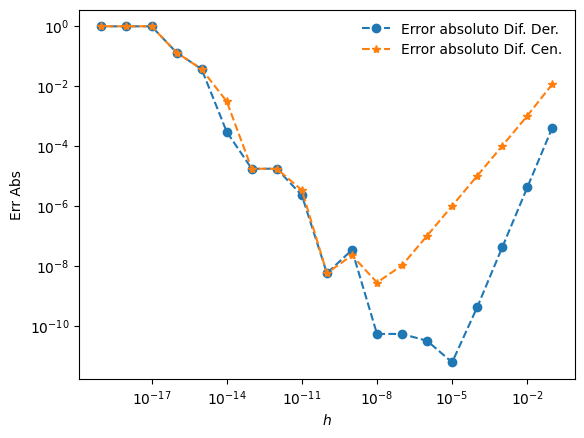

In [16]:
plt.plot(hval, EdatD, ls='--', marker='o', label=r'Error absoluto Dif. Der.')
plt.plot(hval, EdatC, ls='--', marker='*', label=r'Error absoluto Dif. Cen.')

plt.xlabel(r'$h$')
plt.ylabel(r'Err Abs')

plt.xscale('log')
plt.yscale('log')
plt.legend(frameon=False)

## Integrales

In [12]:
E1 = In.I_trapecio([0,2],lambda x: 3*x**2, 50)
E11 = In.I_Sim13([0,2],lambda x: 3*x**2, 15)
E3 = In.I_Sim13([0,(1/np.e)],lambda x: x, 21)
E4 = In.I_Sim18([-1,1],lambda x: x + 2*x**2 - x**3 + 5*x**4)
E5 = In.I_bool([2,3],lambda x: 1/(np.sqrt(x-1)))
E6 = In.I_Sim18([2,1],lambda x: (2*x +1)/(x**2 + x))
E7 = In.I_trapecio([2*np.pi,0],lambda x: np.sin(x), 70)
E8 = In.I_trapecio([1,0],lambda x: 1/(x**2 + 1), 70)
E9 = In.I_trapecio([5,2],lambda x: 1/((x-1)*(x+2)), 70)
E10 = In.I_trapecio([1,0],lambda x: x/(x**4 + 1) , 70)
E2 = In.I_Gauss([0,1],lambda x: np.exp(x))

In [13]:
intervalos = [(0,2),(0,1),(0,np.e),(-1,1), (2,3),(2,1),(2*np.pi,0),(1,0), (5,2),(1,0)]
ecuaciones =    {
                "1": lambda x: 3*x**2
               ,"2": lambda x: np.exp(x)
               ,'3': lambda x: 1/x
               ,'4': lambda x: x + 2*x**2 - x**3 + 5*x**4
               ,'5': lambda x: 1/(np.sqrt(x-1))
               ,'6': lambda x: (2*x +1)/(x**2 + x)
               ,'7': lambda x: np.sin(x)
               ,'8': lambda x: 1/(x**2 + 1)
               ,'9': lambda x: 1/((x-1)*(x+2))
               ,'10': lambda x: x/(x**4 + 1)
                    }


l = ['1','2','3','4','5','6','7','8','9','10']
A = (E1,E2,E3,E4,E5,E6,E7,E8,E9,E10)
print(A)

(8.001665972511454, 1.7178963780075036, 0.06766764161830635, 3.8276576639999993, 0.8113313587691421, -1.1411744046936767, -2.6640404198978603e-16, -0.7853894117346372, -0.2756065324128444, -0.39267282615878923)


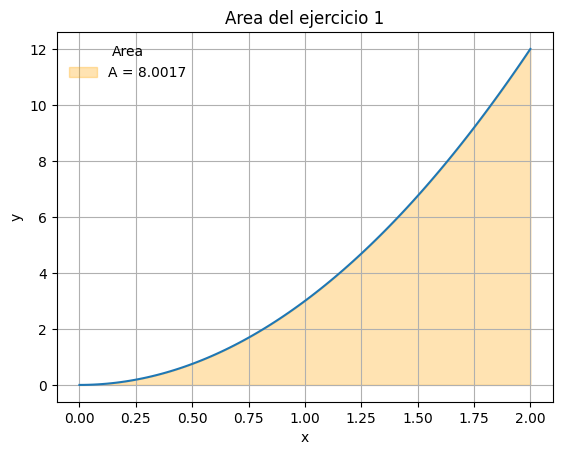

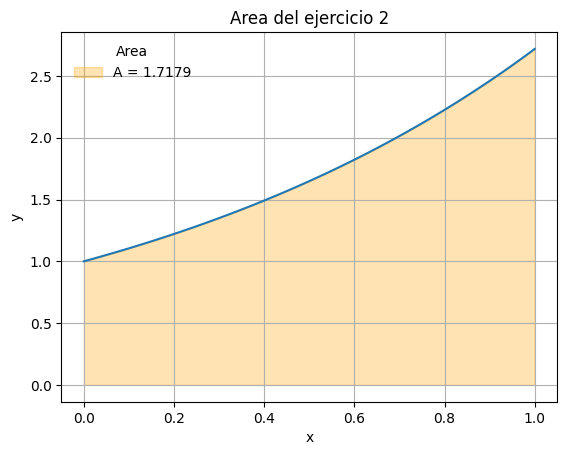

/tmp/ipykernel_2131/1802818230.py:5: RuntimeWarning: divide by zero encountered in divide
  ,'3': lambda x: 1/x


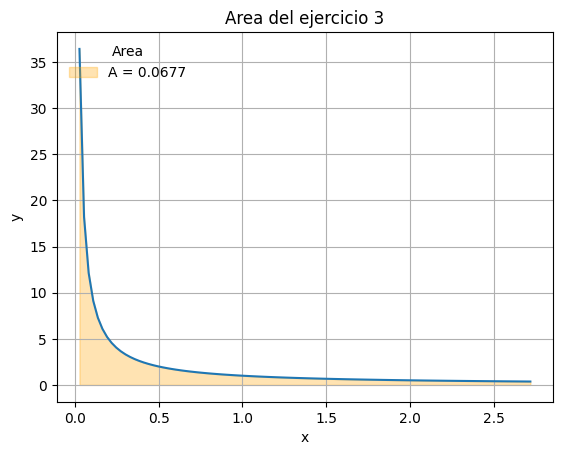

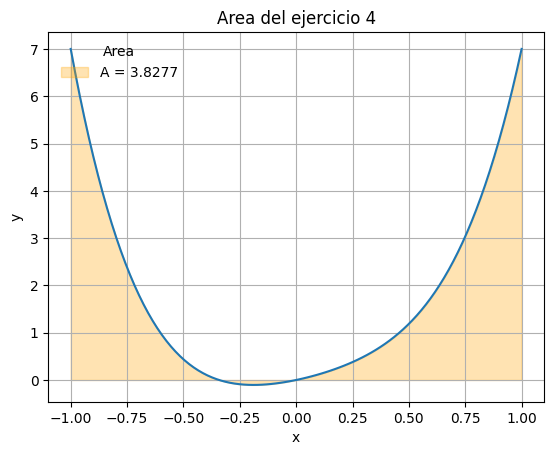

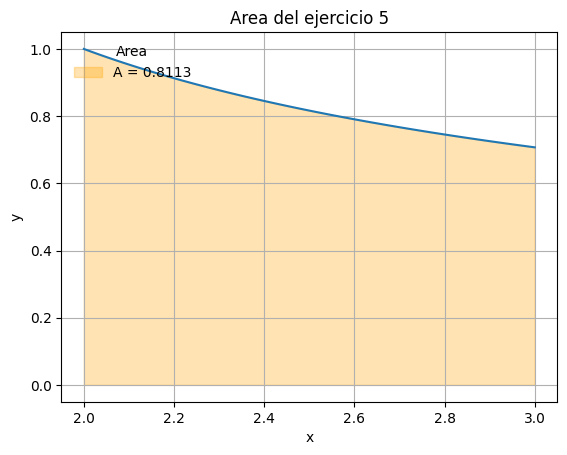

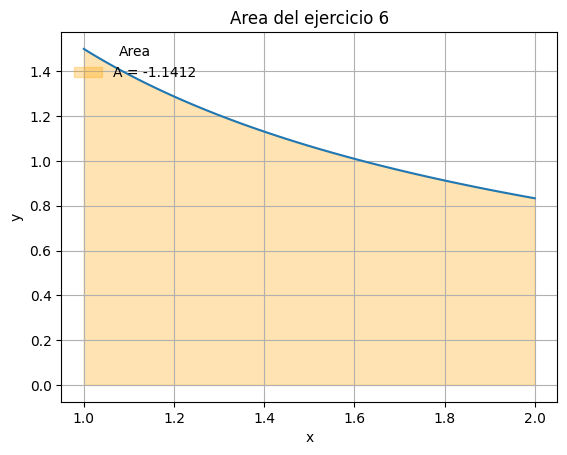

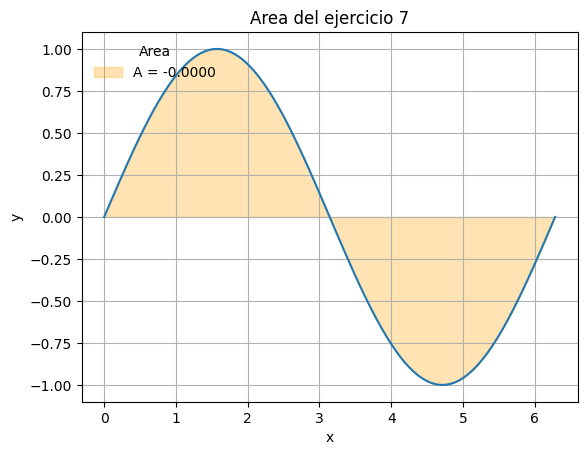

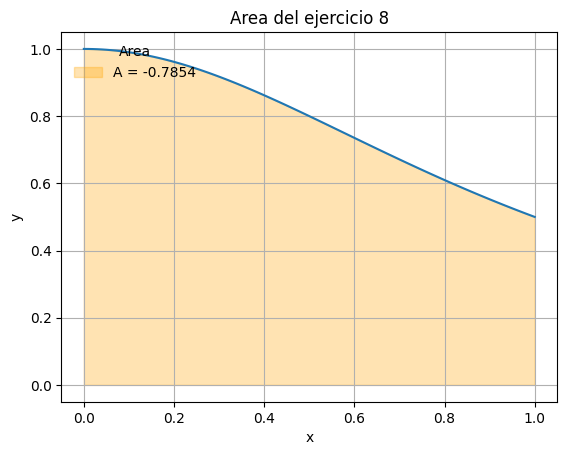

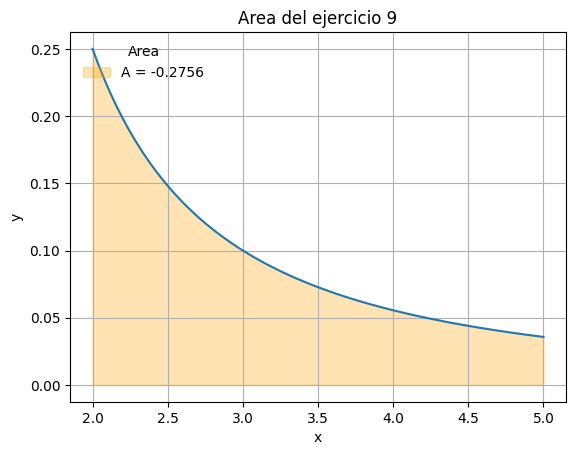

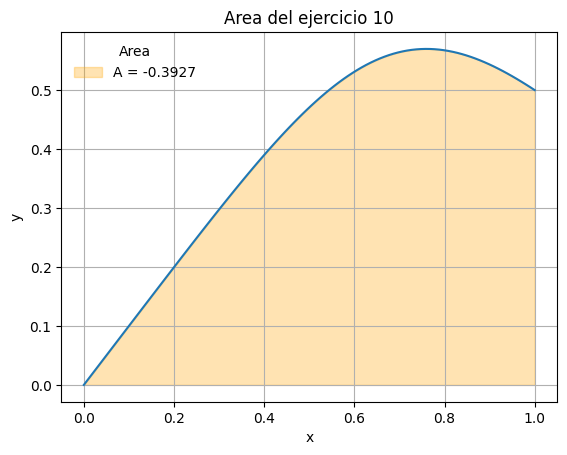

In [14]:
for i in range(10):
    fig, ax = plt.subplots()
    ax.grid(True)
    x1 = intervalos[i]
    x = np.linspace(x1[0],x1[1],100)
    ec = ecuaciones[l[i]]
    y = ec(x)
    plt.plot(x, ec(x))
    ax.fill_between(x,y, label=r'A = %0.4f'% A[i], color = 'orange', alpha = 0.3)
    ax.legend(loc='upper left',  frameon=False, title=r'Area')
    ax.set_xlabel(r'x')
    ax.set_ylabel(r'y')
    ax.set_title(r"Area del ejercicio %d"% (i+1))
    plt.show()

## Interpolaciones

In [6]:
x = [-3,-1,2.2,5,7.2,9]
y = [-4,-2,3.8,6,8,9.2]
x2 = np.linspace(x[0],x[-1],100)
y2 = [Ip.Inter_Cubica_Class2(x,y,i) for _,i in enumerate(x2)]
y3 = [Ip.Interpol_Cubica_Class1(x,y,i) for _,i in enumerate(x2)]
y4 = [Ip.Interpolacion_lineal(x,y,i) for _,i in enumerate(x2)]
x5,y5 = Ip.poli_cardinal(x,y)

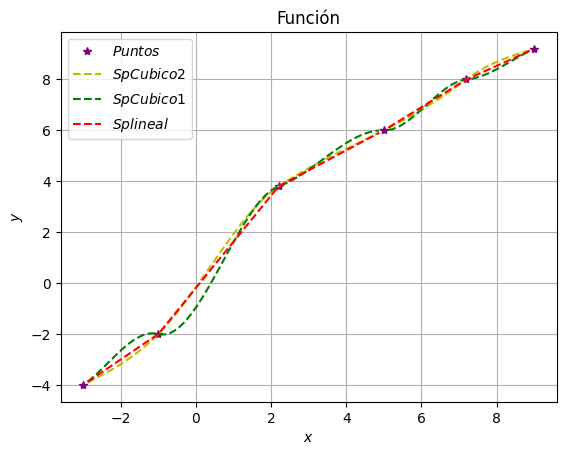

In [8]:
fig, ax = plt.subplots()

ax.plot(x, y, marker = '*', c = 'purple', ls = '', label=r"$Puntos$")
ax.plot(x2, y2, 'y--',label=r"$Sp Cubico2$")
ax.plot(x2, y3, 'g--',label=r"$Sp Cubico1$")
ax.plot(x2, y4, 'r--',label=r"$Sp lineal$")
# ax.plot(x5, y5, 'b--',label=r"$polinomio de legrenge$")
ax.legend(loc=2, frameon=True) 
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title('Función')
ax.grid()

## Ecuaciones diferenciales

Ecuación: $y^{'} = \dfrac{e^{x}}{(1+e^{x})y}$, con (0,1)
$y = \pm \sqrt{2ln(1+e^{x}) + C}$

/tmp/ipykernel_2131/341323760.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  l = lambda x,y: np.exp(x)/((1+np.exp(x))*y)


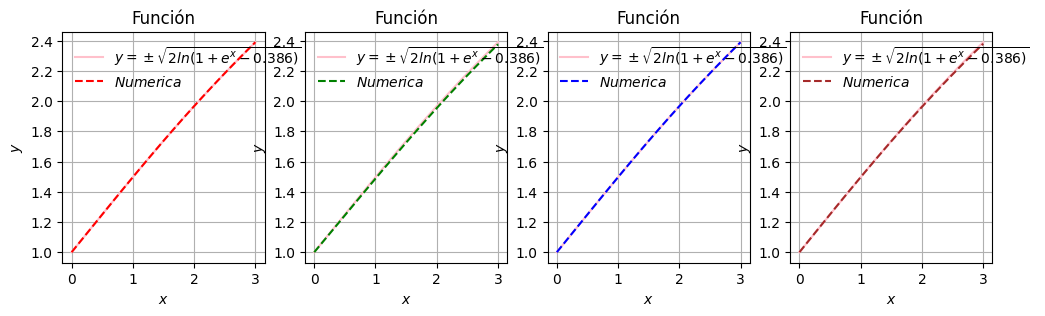

In [23]:
f = lambda x: np.sqrt(2*np.log(1+np.exp(x))-0.3862943)
x2 = np.linspace(0,3,100)
l = lambda x,y: np.exp(x)/((1+np.exp(x))*y)
n = 50
mu = 0.002
x = np.linspace(0,3,n)
y = ed.trapecio(l,[0,3],1,nptos = n)
y2 = ed.Euler_izq(l,[0,3],1,nptos = n)
y3 = ed.Runge_kutta(l,[0,3],1,nptos = n)
y4 = ed.Euler_Der(l,[0,3],1,nptos = n)
fig, ax = plt.subplots(1,4, figsize=(12,3))

ax[0].plot(x2, f(x2), c = 'pink',label=r"$y = \pm \sqrt{2ln(1+e^{x} - 0.386)}$")
ax[0].plot(x, y, 'r--',label=r"$Numerica$")
ax[0].legend(loc=2, frameon=False) # upper left corner
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Función')
ax[0].grid()

ax[1].plot(x2, f(x2), c = 'pink', label=r"$y = \pm \sqrt{2ln(1+e^{x} - 0.386)}$")
ax[1].plot(x, y2, 'g--',label=r"$Numerica$")
ax[1].legend(loc=2, frameon=False) # upper left corner
ax[1].set_xlabel(r'$x$')
ax[1].set_ylabel(r'$y$')
ax[1].set_title('Función')
ax[1].grid()

ax[2].plot(x2, f(x2), c = 'pink', label=r"$y = \pm \sqrt{2ln(1+e^{x} - 0.386)}$")
ax[2].plot(x, y3, 'b--',label=r"$Numerica$")
ax[2].legend(loc=2, frameon=False) # upper left corner
ax[2].set_xlabel(r'$x$')
ax[2].set_ylabel(r'$y$')
ax[2].set_title('Función')
ax[2].grid()

ax[3].plot(x2, f(x2), c = 'pink',label=r"$y = \pm \sqrt{2ln(1+e^{x} - 0.386)}$")
ax[3].plot(x, y4, c = 'brown', ls = '--',label=r"$Numerica$")
ax[3].legend(loc=2, frameon=False) # upper left corner
ax[3].set_xlabel(r'$x$')
ax[3].set_ylabel(r'$y$')
ax[3].set_title('Función')
ax[3].grid()

# Encontrar las condiciones de frontera

In [11]:
def fs(x,y0,k,g):
    z0,z1,u0,u1 = y0

    z0p = z1
    u0p = u1
    z1p= -k*z1*np.sqrt(z1**2 + u1**2)
    u1p = -g - k*u1*np.sqrt(z1**2 + u1**2)
    return [z0p,z1p,u0p,u1p]

In [18]:


k = 1
g = 9.81
x, dx = 1, 2
y, dy = 5, 7.808
t = [0,2.5]
t1 = np.linspace(0,2.5,50)
datos = [k,g]
y0 = [x,dx,y,dy]
x1,y1 = ed.rk4vect_arg(fs,t,y0, datos)

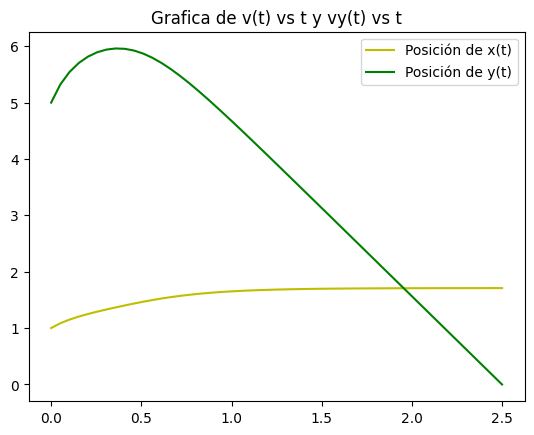

In [19]:
fig, axes = plt.subplots() 
                     
axes.plot(t1, y1[:,0], 'y-', label= 'Posición de x(t)')
axes.plot(x1, y1[:,2], 'g-', label = 'Posición de y(t)')
axes.set_title("Grafica de v(t) vs t y vy(t) vs t")
axes.legend(loc=1)

In [24]:
a, b, b0, bf, npt = 0.018, 0.72, 2.45, 1.15, 400
data =  [a, b, b0, bf, npt]
A, bs, xi = ed.matriz(data, info=False)
invA = np.linalg.inv(A)  
W = np.dot(invA, bs)  

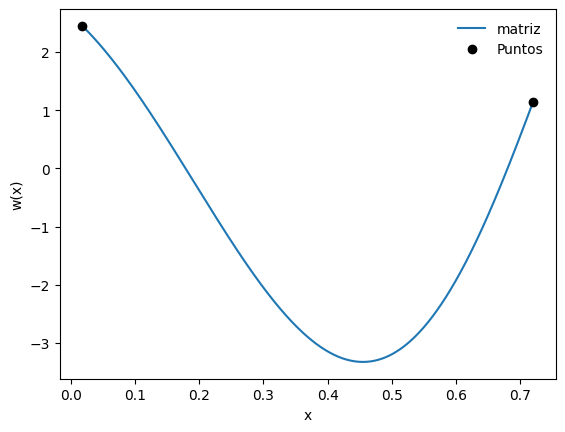

In [10]:
plt.plot(xi, W, label=r'matriz')
plt.plot([a, b], [b0, bf], ls='', c='k', marker='o', label=r'Puntos')
plt.xlabel(r'x')
plt.ylabel(r'w(x)')
plt.legend(frameon=False)

In [9]:
from scipy.linalg import eig
a, b, npt = 0.018, 0.72, 400+1
data = a, b, npt
A, xi, h = ed.matriz2(data, info=False, q=1.5)
lEnig1, V1 = eig(A)

sEng = -np.copy(lEnig1)/h**2  

ii = np.argsort(sEng)   
sEngF2 = sEng[ii] 
VF1 = V1[:, ii]  

/tmp/ipykernel_2076/1548268595.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  ax.plot(xi, y, label=r'$s_{%d}->Autovalores=%3.2f$'% (i,sEngF2[i]))


Text(0.5, 0, 'x')

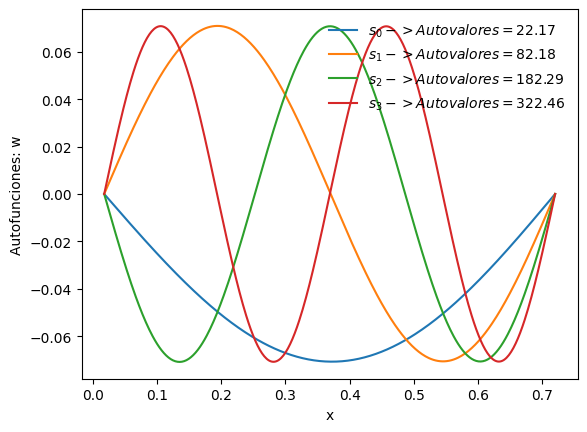

In [11]:
fig, ax = plt.subplots()

for i in range(4):
    y = VF1[:, i]
    ax.plot(xi, y, label=r'$s_{%d}->Autovalores=%3.2f$'% (i,sEngF2[i]))

  
ax.legend(frameon=False)
ax.set_ylabel('Autofunciones: w')
ax.set_xlabel('x')


# Implementación de fitin

In [14]:
v1 = [4.279643E-1,
4.142778E-1,
4.037127E-1,
3.911310E-1,
3.850164E-1,
3.885298E-1,
3.973196E-1,
3.934535E-1,
3.981828E-1,
4.229756E-1,
3.592997E-1,
2.768742E-1,
2.662116E-1,
2.635946E-1]
a1 = [
3.604454E-1,
4.455037E-1,
3.785346E-1,
2.826276E-1,
1.927377E-1,
2.847241E-1,
1.837738E-1,
9.302508E-2,
4.010679E-1,
7.789445E-1,
1.878360E0,
1.553391E0,
2.022255E-1,
3.847456E-1]

t1 = [6.600000E-2,
9.900000E-2,
1.320000E-1,
1.650000E-1,
1.980000E-1,
2.310000E-1,
2.640000E-1,
2.970000E-1,
3.300000E-1,
3.630000E-1,
3.960000E-1,
4.290000E-1,
4.620000E-1,
4.950000E-1]

t2 = [6.600000E-2,
9.900000E-2,
1.320000E-1,
1.650000E-1,
1.980000E-1,
2.310000E-1,
2.640000E-1,
2.970000E-1,
3.300000E-1,
3.630000E-1,
3.960000E-1,
4.290000E-1,
4.620000E-1,
4.950000E-1,
5.280000E-1,
5.610000E-1,
5.940000E-1,
6.270000E-1]
v2 = [
4.653915E-1,
5.038219E-1,
5.158724E-1,
4.899680E-1,
4.651043E-1,
4.661729E-1,
4.297070E-1,
4.942597E-1,
4.131467E-1,
4.180185E-1,
4.535275E-1,
4.385862E-1,
3.723144E-1,
3.604129E-1,
3.554543E-1,
3.692612E-1,
2.300891E-1,
2.499163E-1
]
a2 = [
1.637059E0,
1.197076E0,
3.667737E-1,
7.665735E-1,
3.018451E0,
3.580698E0,
3.951118E0,
3.318000E-1,
5.063535E0,
3.554599E0,
1.603458E0,
1.805671E0,
4.061546E0,
2.634885E-1,
3.445700E0,
2.184670E0,
3.148977E0,
7.860291E0]

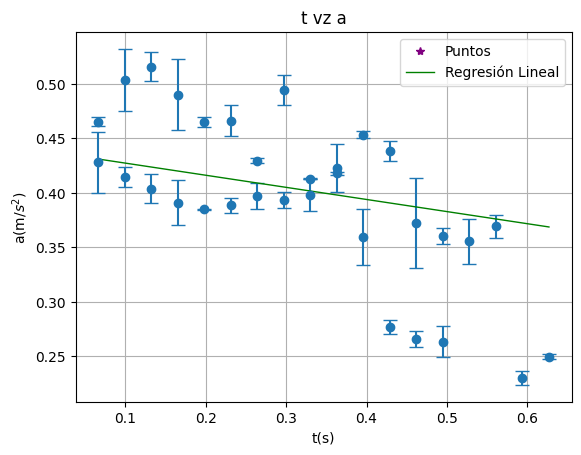

In [17]:
def fbase2(n,i,x):
    if i ==0:
        val = 1
    else:
        val = x
    return val
    

t3 = np.array(t1 + t2)
N = len(t3)
v3 = (v1+v2)
f = lambda x,c0, c1: c0 + c1*x 
np.random.seed(45379)  # fijando la semilla
sigs = 0.02*np.abs(np.random.randn(N))
d0, sig, chi2 = Ip.Gnormalfit(t3,v3,sigs,fbase2,2)
# print(d0)
xv = np.linspace(t3[0],t3[-1],100)

# f = np.full_like(xv, d0)

fig, ax = plt.subplots()
ax.errorbar(t3,v3,err = None, yerr = sigs, capsize=5, ls='', marker='o')
ax.plot(t3, v3,marker = '*', ls = '', lw=1,c='purple', label = 'Puntos')
ax.plot(xv, f(xv,d0[0],d0[1]), ls='-', lw=1, c='g', label = 'Regresión Lineal')
# ax.plot(xv, f,c = 'g',label = 'regresión lineal')
ax.set_title(r"t vz a")
ax.set_ylabel(r"a(m/$s^{2}$)")
ax.set_xlabel("t(s)")
ax.legend(loc=0, frameon=True) # upper left corner
ax.grid()

In [48]:
def relErrorTot(xolds, xnews):
  errs = np.abs((xnews - xolds)/xnews)
  return np.sum(errs)

def gdata():
  data = np.zeros((3,13))
  data[0,:] = np.array([373.1, 492.5, 733, 755, 799, 820,
              877, 1106, 1125, 1403, 1492, 1522, 1561])
  data[1,:] = np.array([156., 638, 3320, 3810, 4440, 5150,
                        6910, 16400, 17700, 44700, 57400, 60600, 67800])
  data[2,:] = np.ones(data.shape[1])  # dispersion 1 para todos
  
  return data

def getKrs(data, cs):
  """
  rho = p(xj)/sigma_j, b = yj/sigma_j
  """
  K = np.zeros((data.shape[1], cs.size))
  
  K[:,0] = 1/data[2,:]
  K[:,1] = data[0,:]**cs[2]/data[2,:]
  K[:,2] = cs[1]*data[0,:]**cs[2]*np.log(data[0,:])/data[2,:]
  
  rs = (data[1,:] - model(cs, data[0,:]))/data[2,:]  # b-rho
  return K, rs

def getKrs2(data, cs):
  """
  rho = p(xj)/sigma_j, b = yj/sigma_j
  """
  K = np.zeros((data.shape[1], cs.size))
  
  K[:,0] = 1/data[2,:]
  K[:,1] = np.exp(-data[0,:]*cs[2])/data[2,:]
  K[:,2] = -cs[1]*data[0,:]*np.exp(-data[0,:]*cs[2])/data[2,:]
  
  rs = (data[1,:] - model2(cs, data[0,:]))/data[2,:]  # b-rho

  return K, rs

def model2(cs, xi):
  p = cs[0]+ cs[1]*x + 2
  return p

def gaussnewton2(data, ckm1, kmax=50, tol=1.e-8):
  for _ in range(kmax):
    K, rs = getKrs2(data, ckm1)
    matK = K.T@K
    invmatK = np.linalg.inv(matK)
    ck = ckm1 + invmatK@K.T@rs
    err = relErrorTot(ckm1, ck)
    if err < tol:
      break
    ckm1 = np.copy(ck)
    
  return ckm1

N = 8
np.random.seed(45379)  # fijando la semilla
dataxs = np.linspace(0, 9, N)
datays = 2 + 5*np.exp(0.1*dataxs) + 0.3*np.random.randn(N)  # la última parte es el ruido
datasigs = 0.2*np.abs(np.random.randn(N))

data = np.array([dataxs, datays, datasigs])

ckm1 = np.array([1, 0.5, -.1]) 
ck2 = gaussnewton2(data, ckm1, tol=1.e-05)
print('El mejor ajuste es: ', ck2)


El mejor ajuste es:  [-2.34915070e+02  2.39566846e+02 -1.10308377e-01]


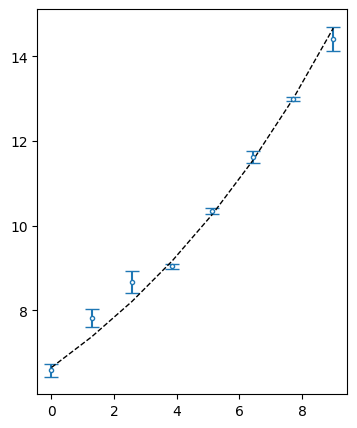

In [31]:
xval = np.linspace(0, 9, N)

fig, ax = plt.subplots(1, 1, figsize=(4, 5), gridspec_kw=dict(hspace=0.2, wspace=.2))

ax.errorbar(data[0], data[1], yerr=data[2], capsize=5, ls='', marker='o', mfc='white', ms=3, mew=1, label=r'Datos')
ax.plot(xval, model2(ck2, xval), ls='--', lw=1, c='k')
